start: 2020/05/05 10:49:29


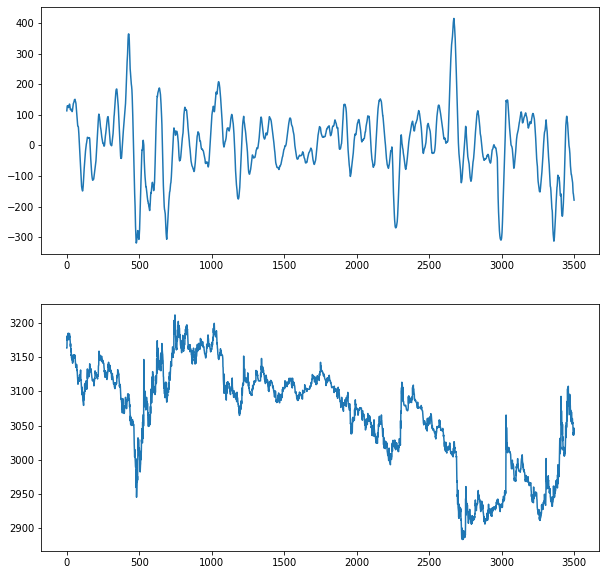

end: 2020/05/05 10:49:32


In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(b):
    x = b.data_test[-3500:]
    y_result = list(b.label_test[-3500:])
    y_predict = list(b.model.predict(x))

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    csv = pd.read_csv("datasets/train_v4.csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    b.set_train_test_dataset(0.8, 0.2)
    
    with open("models/model_v4.pickle", mode="rb") as file:
        b.model = pickle.load(file)

    plot(b)

    
    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()